<a href="https://colab.research.google.com/github/gabymanroe/NYC-Property-Sales/blob/main/NYC_Property_Sales_Group_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A) Data Preparation

## Import Library

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mano
import datetime
import string
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import re
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import dataset csv format from google drive
sheet_url = 'https://drive.google.com/file/d/1xErKNhRbdYWLBjFjZSuqK0DfWZngQMGJ/view' #assign link to a variable
sheet_url_replace = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2] #replace the link

print(sheet_url_replace)

df4 = pd.read_csv(sheet_url_replace) #Import/read the csv file into pandas dataframe
df4.head()

https://drive.google.com/uc?id=1xErKNhRbdYWLBjFjZSuqK0DfWZngQMGJ


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# B) Data Cleaning

##Duplicate

In [ ]:
# Removing the Duplicate values

print("Number of duplicates in the given dataset = {0}".format(sum(df4.duplicated(df4.columns))))
df4 = df4.drop_duplicates(df4.columns, keep='last')
print("Number of duplicates in the given dataset after cleanup = {0}".format(sum(df4.duplicated(df4.columns))))

Number of duplicates in the given dataset = 0
Number of duplicates in the given dataset after cleanup = 0


##Value and Typo

In [ ]:
df4[df4.columns[3]].value_counts()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 R

##Missing and Irrelevant Value

In [ ]:
# Finding out the null values in each column
def check_mv(a):
    print(a.isnull().sum().sort_values(ascending=False))

check_mv(df4)

Unnamed: 0                        0
BOROUGH                           0
SALE PRICE                        0
BUILDING CLASS AT TIME OF SALE    0
TAX CLASS AT TIME OF SALE         0
YEAR BUILT                        0
GROSS SQUARE FEET                 0
LAND SQUARE FEET                  0
TOTAL UNITS                       0
COMMERCIAL UNITS                  0
RESIDENTIAL UNITS                 0
ZIP CODE                          0
APARTMENT NUMBER                  0
ADDRESS                           0
BUILDING CLASS AT PRESENT         0
EASE-MENT                         0
LOT                               0
BLOCK                             0
TAX CLASS AT PRESENT              0
BUILDING CLASS CATEGORY           0
NEIGHBORHOOD                      0
SALE DATE                         0
dtype: int64


In [ ]:
# Drop unnecessary columns
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4.drop('EASE-MENT', axis=1, inplace=True)
df4.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
# BUILDING CLASS KATEGORI which only contain APARTMENTS

df3 = df4[df4['BUILDING CLASS CATEGORY'].str.contains('APARTMENTS')]
print(df3)

       BOROUGH       NEIGHBORHOOD  \
0            1      ALPHABET CITY   
1            1      ALPHABET CITY   
2            1      ALPHABET CITY   
3            1      ALPHABET CITY   
4            1      ALPHABET CITY   
...        ...                ...   
83868        5  WEST NEW BRIGHTON   
83869        5  WEST NEW BRIGHTON   
83870        5  WEST NEW BRIGHTON   
83871        5  WEST NEW BRIGHTON   
84170        5        WESTERLEIGH   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
1      07 RENTALS - WALKUP APARTMENTS                                 2   
2      07 RENTALS - WALKUP APARTMENTS                                 2   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
...                                            ...                  ...   
83868  13 CONDOS - ELEVATOR AP

In [ ]:
# TOTAL UNIT which doesn't contain 0

df2 = df3.loc[~(df3['TOTAL UNITS'] == 0)]
print(df2)

       BOROUGH       NEIGHBORHOOD  \
0            1      ALPHABET CITY   
1            1      ALPHABET CITY   
2            1      ALPHABET CITY   
3            1      ALPHABET CITY   
4            1      ALPHABET CITY   
...        ...                ...   
83868        5  WEST NEW BRIGHTON   
83869        5  WEST NEW BRIGHTON   
83870        5  WEST NEW BRIGHTON   
83871        5  WEST NEW BRIGHTON   
84170        5        WESTERLEIGH   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
1      07 RENTALS - WALKUP APARTMENTS                                 2   
2      07 RENTALS - WALKUP APARTMENTS                                 2   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
...                                            ...                  ...   
83868  13 CONDOS - ELEVATOR AP

In [ ]:
df2[df2.columns[18]].value_counts()

SALE PRICE
 -         3015
0          1656
10          164
1200000      66
1100000      65
           ... 
751977        1
1049490       1
1194916       1
1067635       1
172000        1
Name: count, Length: 4808, dtype: int64

In [ ]:
# Convert the column to numeric type before applying conditions
df2['SALE PRICE'] = pd.to_numeric(df2['SALE PRICE'], errors='coerce')

# Filter the DataFrame based on conditions
df = df2.loc[~(df2['SALE PRICE']=='-') & ~(df2['SALE PRICE']==0) & (df2['SALE PRICE'] > 100000)]
print(df)

       BOROUGH       NEIGHBORHOOD  \
0            1      ALPHABET CITY   
3            1      ALPHABET CITY   
4            1      ALPHABET CITY   
6            1      ALPHABET CITY   
9            1      ALPHABET CITY   
...        ...                ...   
83861        5  WEST NEW BRIGHTON   
83862        5  WEST NEW BRIGHTON   
83869        5  WEST NEW BRIGHTON   
83870        5  WEST NEW BRIGHTON   
83871        5  WEST NEW BRIGHTON   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
6      07 RENTALS - WALKUP APARTMENTS                                2B   
9      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                                            ...                  ...   
83861  07 RENTALS - WALKUP APA

##Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12320 entries, 0 to 83871
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         12320 non-null  int64  
 1   NEIGHBORHOOD                    12320 non-null  object 
 2   BUILDING CLASS CATEGORY         12320 non-null  object 
 3   TAX CLASS AT PRESENT            12320 non-null  object 
 4   BLOCK                           12320 non-null  int64  
 5   LOT                             12320 non-null  int64  
 6   BUILDING CLASS AT PRESENT       12320 non-null  object 
 7   ADDRESS                         12320 non-null  object 
 8   APARTMENT NUMBER                12320 non-null  object 
 9   ZIP CODE                        12320 non-null  int64  
 10  RESIDENTIAL UNITS               12320 non-null  int64  
 11  COMMERCIAL UNITS                12320 non-null  int64  
 12  TOTAL UNITS                     12320

In [ ]:
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df['SALE PRICE'] = df['SALE PRICE'].astype(float)
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['sale_month']= df['SALE DATE'].dt.month_name()
df['sale_year']= df['SALE DATE'].dt.year

In [ ]:
print(df)

             BOROUGH       NEIGHBORHOOD  \
0          Manhattan      ALPHABET CITY   
3          Manhattan      ALPHABET CITY   
4          Manhattan      ALPHABET CITY   
6          Manhattan      ALPHABET CITY   
9          Manhattan      ALPHABET CITY   
...              ...                ...   
83861  Staten Island  WEST NEW BRIGHTON   
83862  Staten Island  WEST NEW BRIGHTON   
83869  Staten Island  WEST NEW BRIGHTON   
83870  Staten Island  WEST NEW BRIGHTON   
83871  Staten Island  WEST NEW BRIGHTON   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
6      07 RENTALS - WALKUP APARTMENTS                                2B   
9      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                              

##Apartment

In [ ]:
# Number of Apartment
df['BUILDING CLASS CATEGORY'].value_counts()

BUILDING CLASS CATEGORY
13 CONDOS - ELEVATOR APARTMENTS                9731
07 RENTALS - WALKUP APARTMENTS                 1710
12 CONDOS - WALKUP APARTMENTS                   647
08 RENTALS - ELEVATOR APARTMENTS                198
10 COOPS - ELEVATOR APARTMENTS                   25
09 COOPS - WALKUP APARTMENTS                      9
Name: count, dtype: int64

In [ ]:
# Total Apartment
total_apartment = df['BUILDING CLASS CATEGORY'].sum
print(total_apartment)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        07 RENTALS - WALKUP APARTMENTS             
3        07 RENTALS - WALKUP APARTMENTS             
4        07 RENTALS - WALKUP APARTMENTS             
6        07 RENTALS - WALKUP APARTMENTS             
9        08 RENTALS - ELEVATOR APARTMENTS           
                            ...                     
83861    07 RENTALS - WALKUP APARTMENTS             
83862    07 RENTALS - WALKUP APARTMENTS             
83869    13 CONDOS - ELEVATOR APARTMENTS            
83870    13 CONDOS - ELEVATOR APARTMENTS            
83871    13 CONDOS - ELEVATOR APARTMENTS            
Name: BUILDING CLASS CATEGORY, Length: 12320, dtype: object>


# C) EDA
* How the sales trend for building class category apartment?
* How many apartments are sold each month?
* What is the highest price for apartment sales each month?
* What are the characteristics of customers in each borough?


##Sales Trend for Building Class Category Apartment

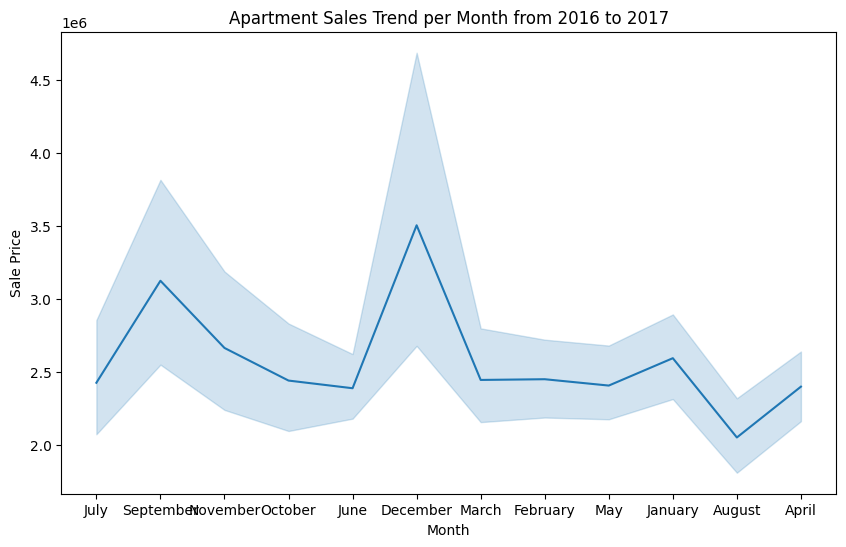

In [ ]:
plt.figure(figsize=(10,6))

sns.lineplot(x='sale_month',y='SALE PRICE',data=df)
plt.title('Apartment Sales Trend per Month from 2016 to 2017')
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show();

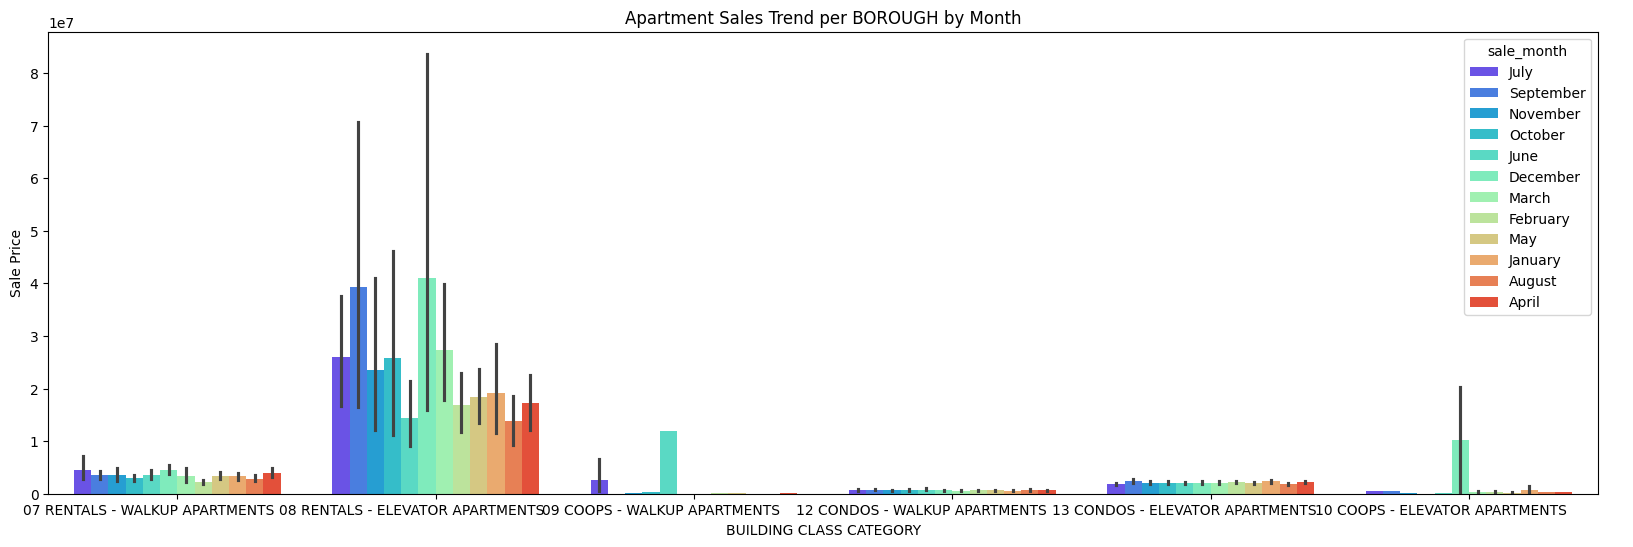

In [ ]:
plt.figure(figsize=(20,6))

sns.barplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', hue='sale_month', data=df, palette='rainbow');
plt.title('Apartment Sales Trend per BOROUGH by Month')
plt.ylabel('Sale Price')
plt.show()

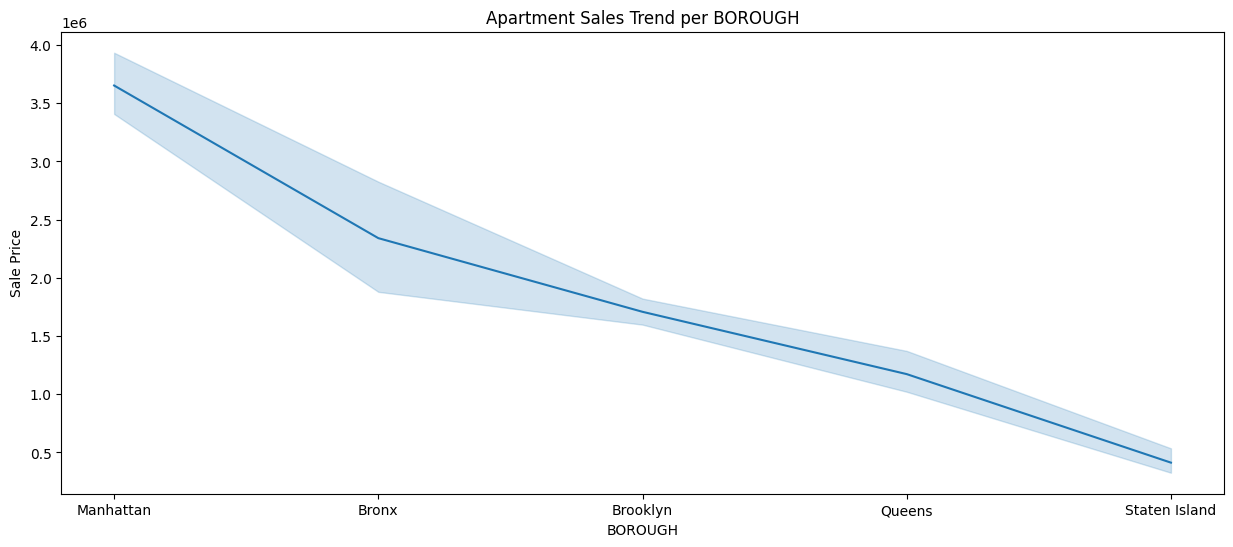

In [ ]:
plt.figure(figsize=(15,6))

sns.lineplot(x='BOROUGH',y='SALE PRICE',data=df)
plt.title('Apartment Sales Trend per BOROUGH')
plt.ylabel('Sale Price')
plt.show();

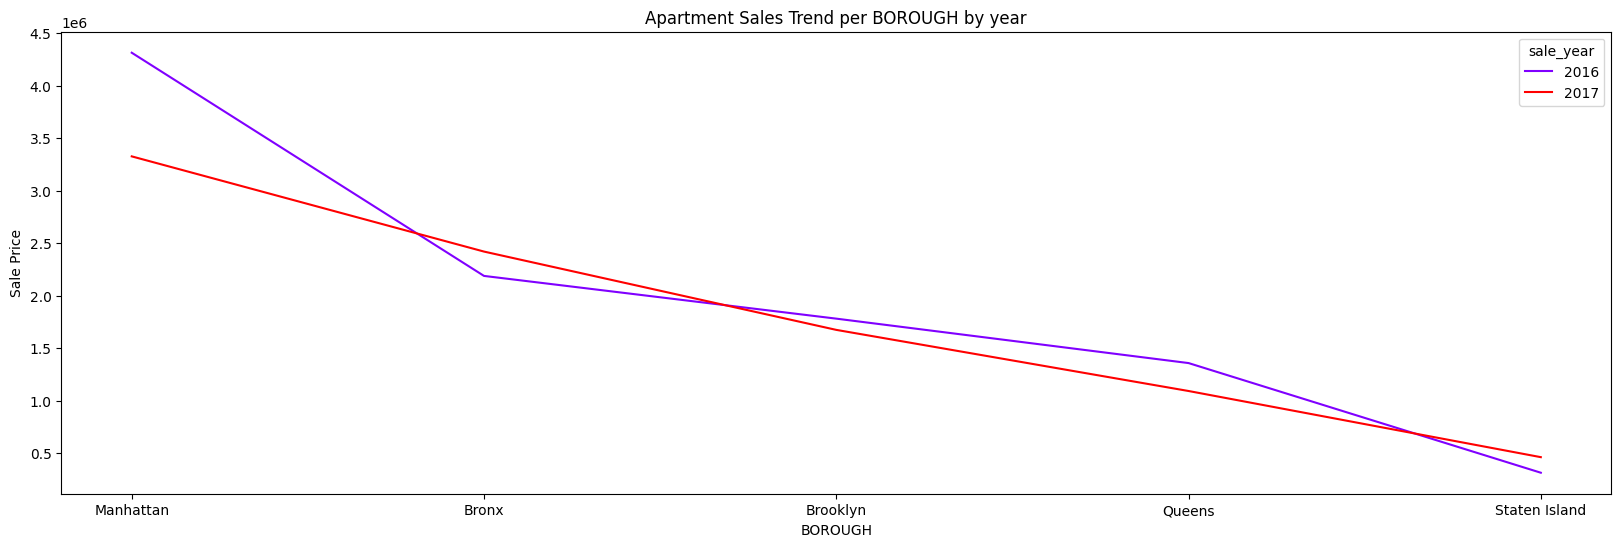

In [ ]:
plt.figure(figsize=(20,6))

sns.lineplot(x="BOROUGH",y="SALE PRICE",hue='sale_year',data=df, palette='rainbow',ci=None)
plt.title('Apartment Sales Trend per BOROUGH by year');
plt.ylabel('Sale Price');

##Number of Apartment Sold Each Month

In [ ]:
# Convert 'BOROUGH' to categorical type
df['BOROUGH'] = pd.Categorical(df['BOROUGH'])

# Group by 'BOROUGH' and 'sale_month' and count the occurrences
grouped_df = df.groupby(['BOROUGH', 'sale_month']).size().reset_index(name='count')

# Plot using Plotly Express
fig = px.scatter(grouped_df, x='sale_month', y='BOROUGH', size='count', color='count',
                 size_max=50, color_continuous_scale='viridis',
                 labels={'count': 'Count', 'sale_month': 'Month', 'BOROUGH': 'Borough'},
                 title='Number of Apartment Sold in Each Borough')

fig.show()

##The Highest Price for Apartment Sales Each Month

In [ ]:
# Rainbow plot with Plotly Express
colors = px.colors.qualitative.Set1  # Set1 is a qualitative color scale

fig = px.box(df, x='sale_month', y='SALE PRICE', color='sale_month',
             category_orders={'sale_month': ['sale_month']},
             color_discrete_sequence=colors, points='all', title='Apartment Prices in each Month',
             labels={'sale_month': 'Month', 'SALE PRICE': 'Sale Price'})

fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Sale Price'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig.show()

##The Characteristics of Customers in Each Borough

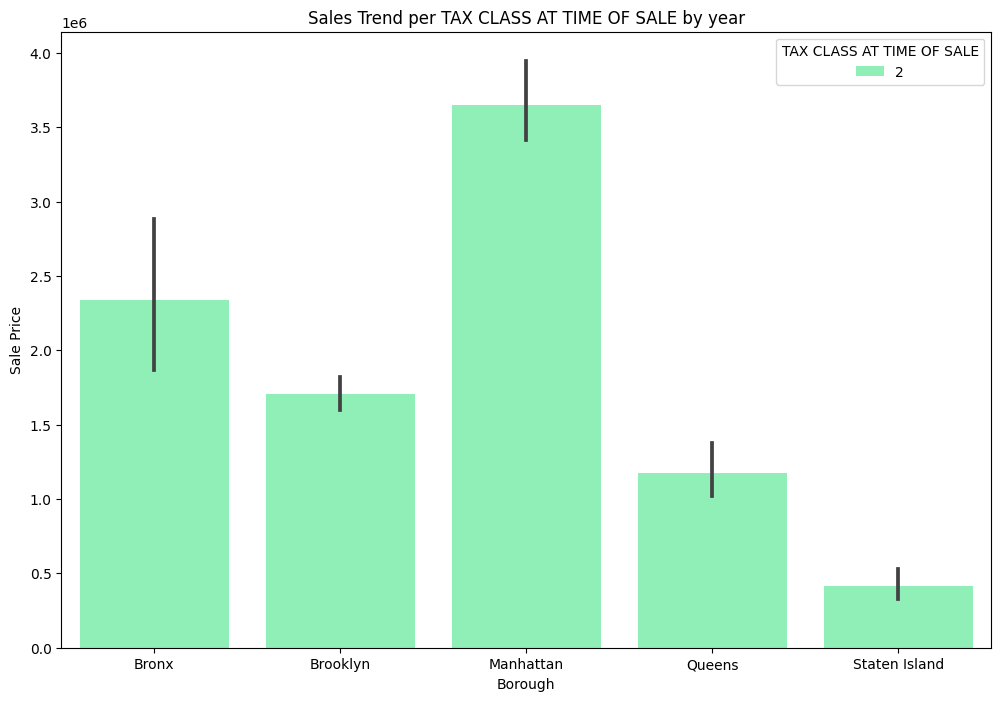

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Sales Trend per TAX CLASS AT TIME OF SALE by year')

sns.barplot(x="BOROUGH",y="SALE PRICE",hue='TAX CLASS AT TIME OF SALE',data=df[df['TAX CLASS AT TIME OF SALE']!= ' '], palette='rainbow');
plt.xlabel('Borough')
plt.ylabel('Sale Price');

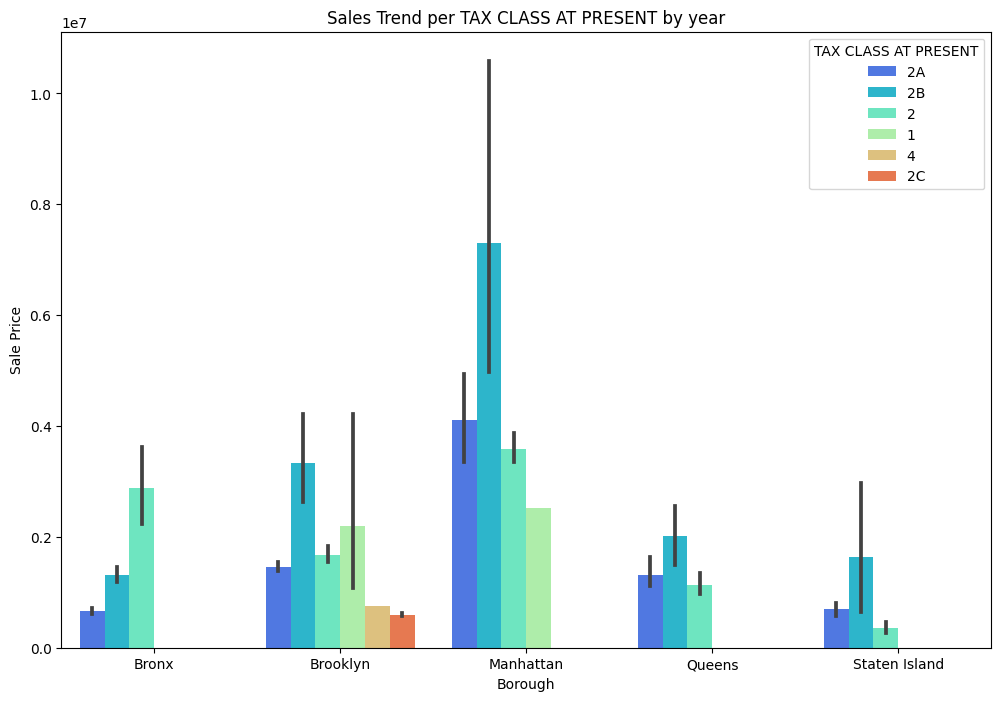

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Sales Trend per TAX CLASS AT PRESENT by year')

sns.barplot(x="BOROUGH",y="SALE PRICE",hue='TAX CLASS AT PRESENT',data=df[df['TAX CLASS AT PRESENT']!= ' '], palette='rainbow');
plt.xlabel('Borough')
plt.ylabel('Sale Price');

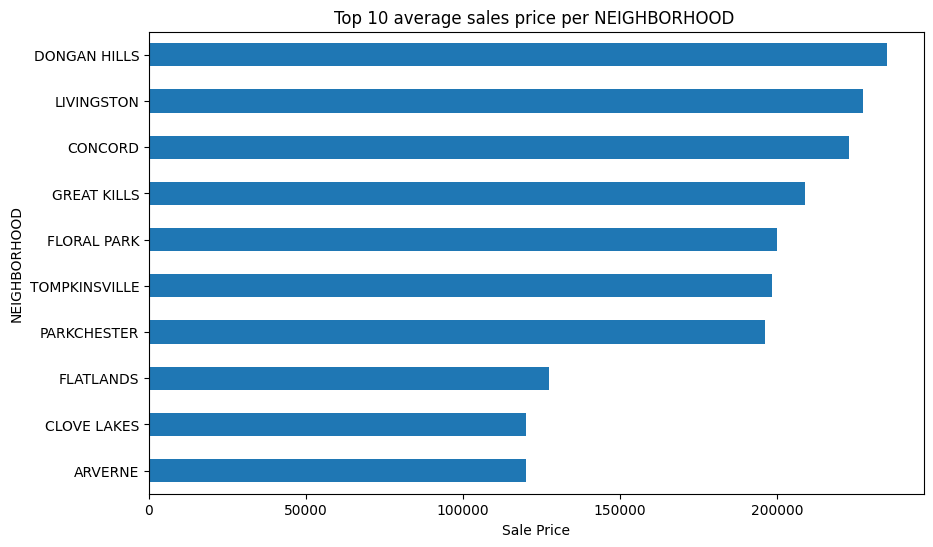

In [ ]:
plt.figure(figsize=(10,6))
df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).mean().sort_values()[:10].plot.barh()
plt.title('Top 10 average sales price per NEIGHBORHOOD ')
plt.xlabel("Sale Price");

In [ ]:
df4.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
df.to_csv('Clean-NYC-Property-Sales.csv', sep=',', index=False, encoding='utf-8')

NameError: name 'df' is not defined